Referencias:  
https://www.kaggle.com/code/gunesevitan/titanic-advanced-feature-engineering-tutorial

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")

from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import StratifiedKFold

import string
import warnings
warnings.filterwarnings('ignore')

SEED = 42

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import string
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import roc_curve, auc
import missingno as msno
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.model_selection import GridSearchCV, StratifiedKFold, cross_val_score
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier, VotingClassifier, ExtraTreesClassifier, GradientBoostingClassifier

### 2. EDA

In [4]:
train_data = pd.read_csv('/content/drive/MyDrive/Kaggle/01. Titanic/train.csv')
test_data = pd.read_csv(('/content/drive/MyDrive/Kaggle/01. Titanic/test.csv'))
titanic = pd.concat([train_data, test_data], axis=0)
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [5]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 132.9+ KB


In [6]:
titanic.nunique()

PassengerId    1309
Survived          2
Pclass            3
Name           1307
Sex               2
Age              98
SibSp             7
Parch             8
Ticket          929
Fare            281
Cabin           186
Embarked          3
dtype: int64

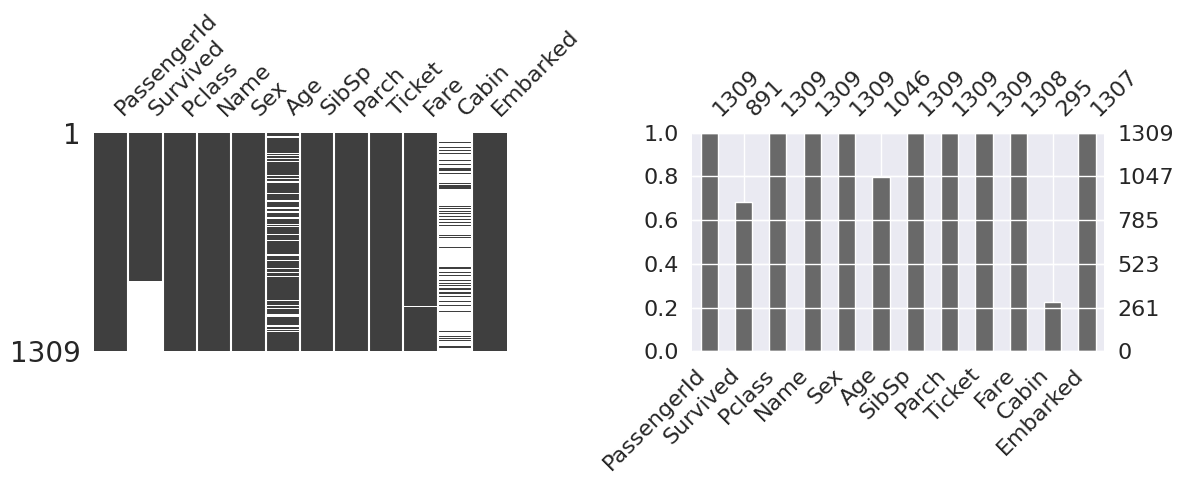

In [7]:
# Crea una figura con dos subplots en una fila
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Grafico 1 - msno.matrix
plt.subplot(1, 2, 1)
msno.matrix(titanic, ax=axes[0])

# Grafico 2 - msno.bar
plt.subplot(1, 2, 2)
msno.bar(titanic, ax=axes[1])

# Ajusta los espacios entre los subplots
plt.tight_layout()

# Muestra los gráficos
plt.show()


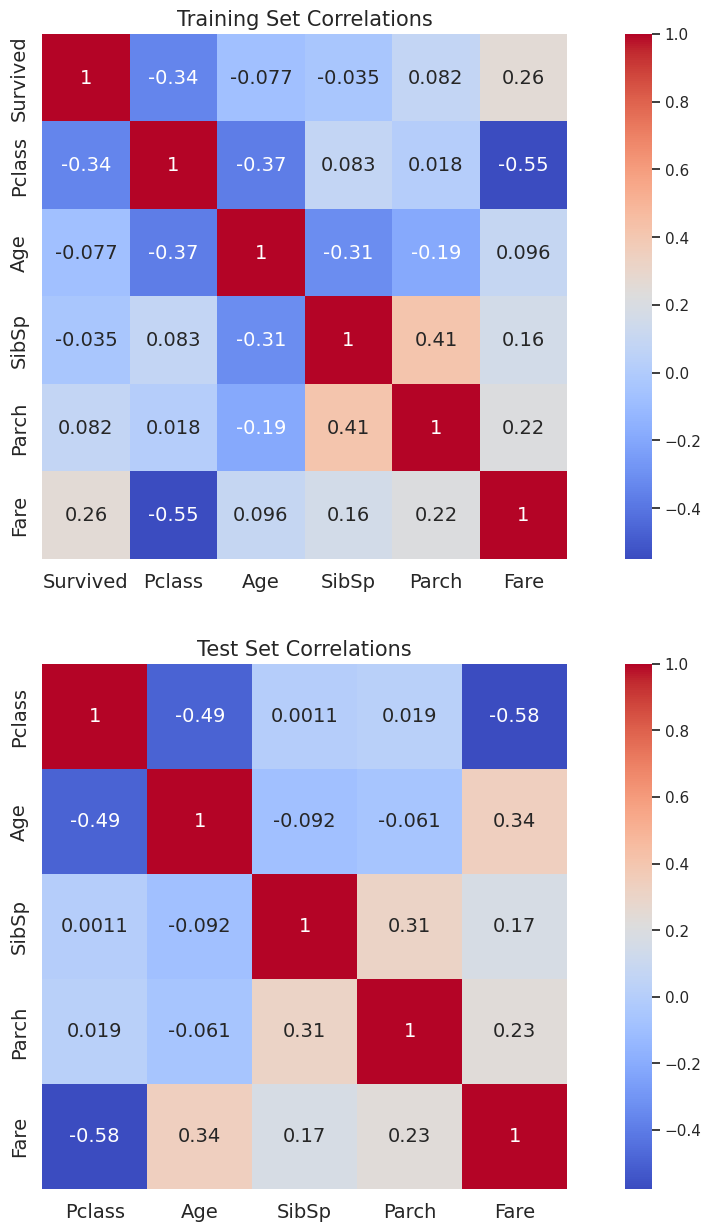

In [8]:
fig, axs = plt.subplots(nrows=2, figsize=(15, 15))

sns.heatmap(train_data.drop(['PassengerId'], axis=1).corr(), ax=axs[0], annot=True, square=True, cmap='coolwarm', annot_kws={'size': 14})
sns.heatmap(test_data.drop(['PassengerId'], axis=1).corr(), ax=axs[1], annot=True, square=True, cmap='coolwarm', annot_kws={'size': 14})

for i in range(2):
    axs[i].tick_params(axis='x', labelsize=14)
    axs[i].tick_params(axis='y', labelsize=14)

axs[0].set_title('Training Set Correlations', size=15)
axs[1].set_title('Test Set Correlations', size=15)

plt.show()

En el código proporcionado, las funciones `size()` y `unstack()` se utilizan para manipular y preparar los datos antes de trazar los gráficos.

1. `size()`: Esta función se aplica a un objeto de grupo generado por `groupby()` y devuelve el tamaño de cada grupo. En el código, se utiliza para calcular el tamaño de cada combinación de categorías en las columnas 'Embarked', 'Pclass' y 'Sex', junto con la columna 'Survived'. Esto proporciona el recuento de registros para cada combinación en el conjunto de datos.

2. `unstack()`: Esta función se aplica a un objeto de Serie o DataFrame y se utiliza para desapilar los niveles internos de un índice jerárquico, convirtiéndolo en un DataFrame más plano. En el código, se aplica después de `size()` para reorganizar los datos de manera que cada categoría de 'Survived' se convierte en una columna separada. Esto permite trazar gráficos de barras con las categorías 'Survived' en el eje x y los recuentos en el eje y.

En resumen, el código realiza los siguientes pasos para cada combinación de categorías en las columnas 'Embarked', 'Pclass' y 'Sex':
- Calcula el tamaño de cada grupo utilizando `size()`.
- Desapila los niveles del índice jerárquico utilizando `unstack()`.
- Genera un gráfico de barras para visualizar los recuentos de cada categoría de 'Survived' utilizando `plot(kind='bar')`.

El resultado es una matriz de tres gráficos de barras, donde cada gráfico muestra la distribución de supervivencia según la categoría especificada ('Embarked', 'Pclass' y 'Sex').

<Axes: xlabel='Sex'>

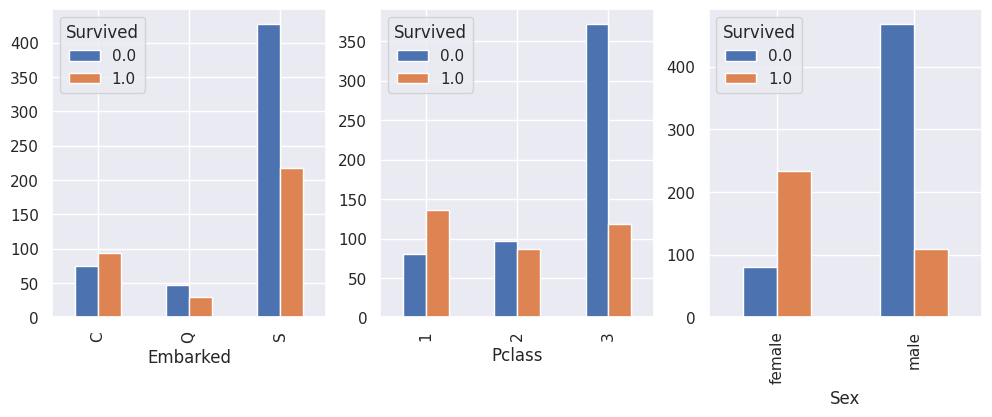

In [9]:
fig, axes = plt.subplots(1, 3, figsize=(12, 4))
axes = axes.flatten()

titanic.groupby(['Embarked', 'Survived']).size().unstack().plot(kind='bar', ax=axes[0])
titanic.groupby(['Pclass', 'Survived']).size().unstack().plot(kind='bar', ax=axes[1])
titanic.groupby(['Sex', 'Survived']).size().unstack().plot(kind='bar', ax=axes[2])

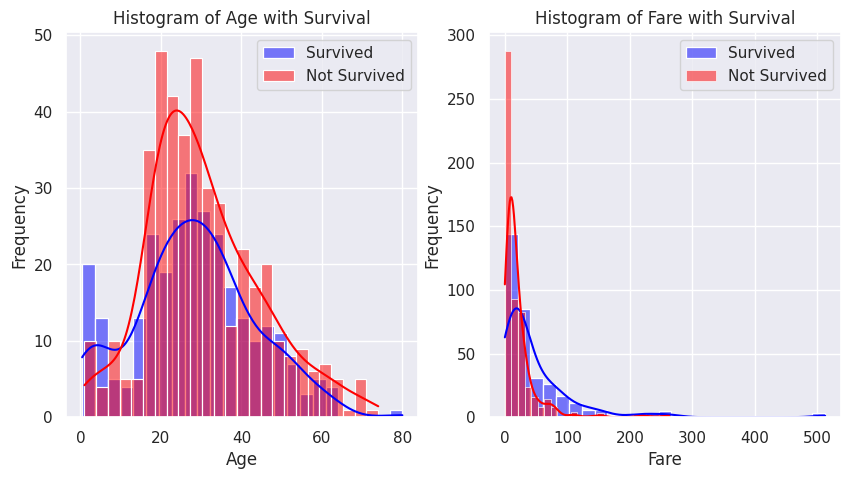

In [10]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

survived_data = titanic[titanic['Survived'] == 1]['Age']
not_survived_data = titanic[titanic['Survived'] == 0]['Age']

sns.histplot(survived_data, bins=25, color='blue', label='Survived', kde=True, ax=axes[0])
sns.histplot(not_survived_data, bins=25, color='red', label='Not Survived', kde=True, ax=axes[0])

axes[0].set_xlabel('Age')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Histogram of Age with Survival')
axes[0].legend()

survived_data = titanic[titanic['Survived'] == 1]['Fare']
not_survived_data = titanic[titanic['Survived'] == 0]['Fare']

sns.histplot(survived_data, bins=25, color='blue', label='Survived', kde=True, ax=axes[1])
sns.histplot(not_survived_data, bins=25, color='red', label='Not Survived', kde=True, ax=axes[1])

axes[1].set_xlabel('Fare')
axes[1].set_ylabel('Frequency')
axes[1].set_title('Histogram of Fare with Survival')
axes[1].legend()

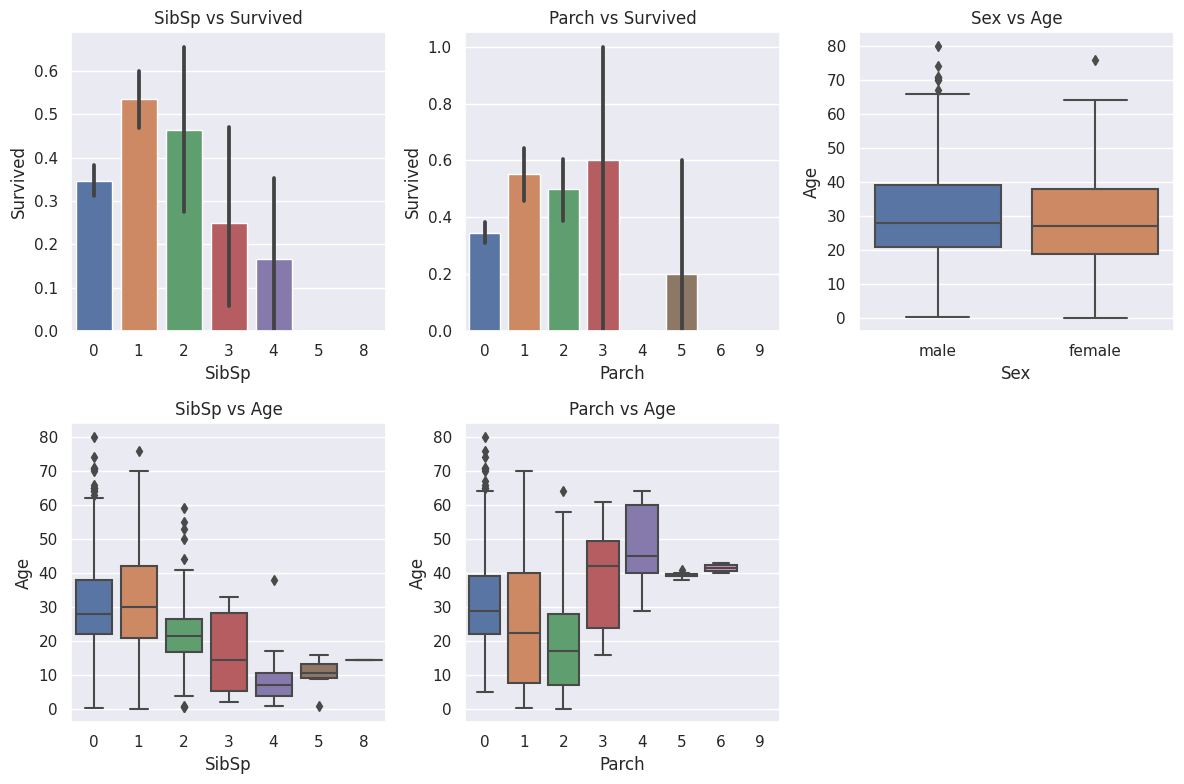

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# Crea la estructura de subplots en una cuadrícula de 2 filas y 3 columnas
fig, axes = plt.subplots(2, 3, figsize=(12, 8))

# Gráfico 1 - SibSp vs Survived (Barplot)
sns.barplot(data=titanic, x='SibSp', y='Survived', ax=axes[0, 0])
axes[0, 0].set_title("SibSp vs Survived")

# Gráfico 2 - Parch vs Survived (Barplot)
sns.barplot(data=titanic, x='Parch', y='Survived', ax=axes[0, 1])
axes[0, 1].set_title("Parch vs Survived")

# Gráfico 3 - Sex vs Age (Boxplot)
sns.boxplot(data=titanic, x='Sex', y='Age', ax=axes[0, 2])
axes[0, 2].set_title("Sex vs Age")

# Gráfico 4 - SibSp vs Age (Boxplot)
sns.boxplot(data=titanic, x='SibSp', y='Age', ax=axes[1, 0])
axes[1, 0].set_title("SibSp vs Age")

# Gráfico 5 - Parch vs Age (Boxplot)
sns.boxplot(data=titanic, x='Parch', y='Age', ax=axes[1, 1])
axes[1, 1].set_title("Parch vs Age")

# Elimina los subplots no utilizados
axes[1, 2].axis('off')

# Ajusta los espacios entre los subplots
plt.tight_layout()

# Muestra los gráficos
plt.show()


### 3. Feature Engineering

#### 3.1 Imputar los MV basado en el sexo y la clase

In [12]:
titanic['Age'] = titanic.groupby(['Sex', 'Pclass'])['Age'].transform(lambda x: x.fillna(x.median()))

#### 3.2 Embarked, se conoce que la persona abordó en Southampton

In [13]:
titanic[titanic['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1.0,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1.0,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [14]:
titanic['Embarked'].fillna("S", inplace=True)

#### 3.3 Hay un pasajero de tercera clase sin tarifa, se le imputa la tarifa promedio de la clase

In [15]:
titanic[titanic['Fare'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
152,1044,NaN,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S


In [16]:
med_fare = titanic.groupby(['Pclass', 'Parch', 'SibSp']).Fare.median()[3][0][0]
titanic['Fare'] = titanic['Fare'].fillna(med_fare)

#### 3.4 Encontrar 'Deck' desde la variable cabina

![image.png](attachment:image.png)

In [17]:
# Creating Deck column from the first letter of the Cabin column (M stands for Missing)
titanic['Deck'] = titanic['Cabin'].apply(lambda x: x[0] if pd.notnull(x) else "M")

Función para visualizar el % de pasajeros por clase en los distintos decks

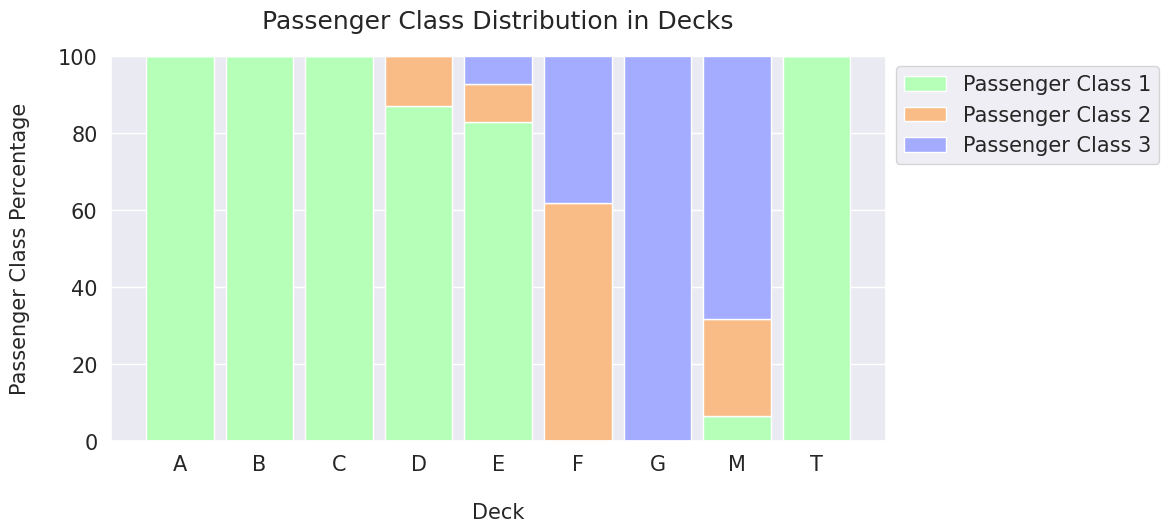

In [18]:
titanic_decks = titanic.groupby(['Deck', 'Pclass']).count().drop(columns=['Survived', 'Sex', 'Age', 'SibSp', 'Parch',
                                                                        'Fare', 'Embarked', 'Cabin', 'PassengerId', 'Ticket']).rename(columns={'Name': 'Count'}).transpose()

def get_pclass_dist(df):

    # Creating a dictionary for every passenger class count in every deck
    deck_counts = {'A': {}, 'B': {}, 'C': {}, 'D': {}, 'E': {}, 'F': {}, 'G': {}, 'M': {}, 'T': {}}
    decks = df.columns.levels[0]

    for deck in decks:
        for pclass in range(1, 4):
            try:
                count = df[deck][pclass][0]
                deck_counts[deck][pclass] = count
            except KeyError:
                deck_counts[deck][pclass] = 0

    df_decks = pd.DataFrame(deck_counts)
    deck_percentages = {}

    # Creating a dictionary for every passenger class percentage in every deck
    for col in df_decks.columns:
        deck_percentages[col] = [(count / df_decks[col].sum()) * 100 for count in df_decks[col]]

    return deck_counts, deck_percentages

def display_pclass_dist(percentages):

    df_percentages = pd.DataFrame(percentages).transpose()
    deck_names = ('A', 'B', 'C', 'D', 'E', 'F', 'G', 'M', 'T')
    bar_count = np.arange(len(deck_names))
    bar_width = 0.85

    pclass1 = df_percentages[0]
    pclass2 = df_percentages[1]
    pclass3 = df_percentages[2]

    plt.figure(figsize=(10, 5))
    plt.bar(bar_count, pclass1, color='#b5ffb9', edgecolor='white', width=bar_width, label='Passenger Class 1')
    plt.bar(bar_count, pclass2, bottom=pclass1, color='#f9bc86', edgecolor='white', width=bar_width, label='Passenger Class 2')
    plt.bar(bar_count, pclass3, bottom=pclass1 + pclass2, color='#a3acff', edgecolor='white', width=bar_width, label='Passenger Class 3')

    plt.xlabel('Deck', size=15, labelpad=20)
    plt.ylabel('Passenger Class Percentage', size=15, labelpad=20)
    plt.xticks(bar_count, deck_names)
    plt.tick_params(axis='x', labelsize=15)
    plt.tick_params(axis='y', labelsize=15)

    plt.legend(loc='upper left', bbox_to_anchor=(1, 1), prop={'size': 15})
    plt.title('Passenger Class Distribution in Decks', size=18, y=1.05)

    plt.show()

all_deck_count, all_deck_per = get_pclass_dist(titanic_decks)
display_pclass_dist(all_deck_per)

Asignamos el único pasajero en el Deck T al Deck A, pues pertenece a la Clase 1

In [19]:
titanic.query('Deck == "T"')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Deck
339,340,0.0,1,"Blackwell, Mr. Stephen Weart",male,45.0,0,0,113784,35.5,T,S,T


In [20]:
# Passenger in the T deck is changed to A
titanic.loc[titanic[titanic['Deck'] == 'T'].index, 'Deck'] = 'A'

Función para visualizar el % de sobrevivencia en cada Deck

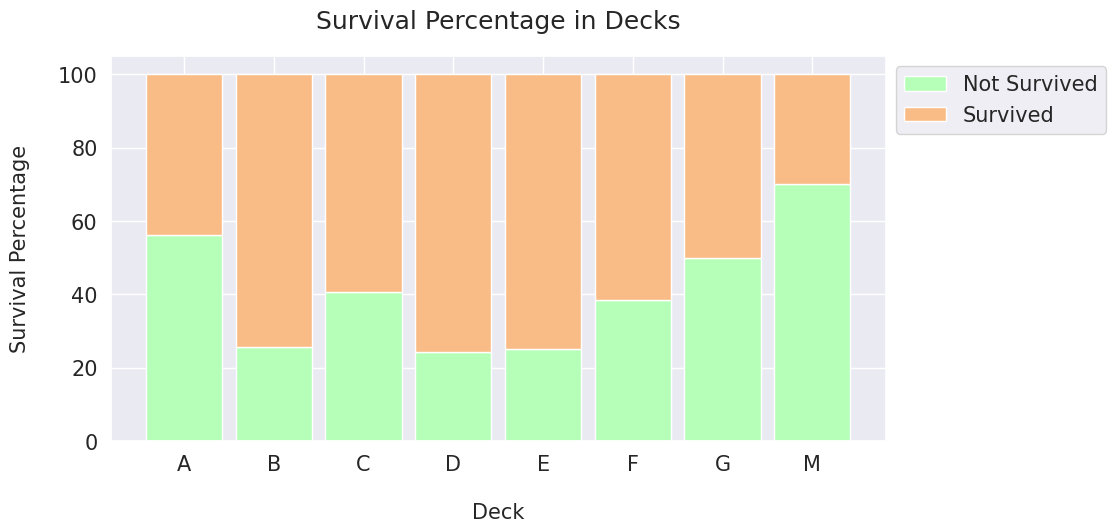

In [21]:
titanic_deck_surv = titanic.groupby(['Deck', 'Survived']).count().drop(columns=['Sex', 'Age', 'SibSp', 'Parch', 'Fare',
                                                                                   'Embarked', 'Pclass', 'Cabin', 'PassengerId', 'Ticket']).rename(columns={'Name':'Count'}).transpose()

def get_survived_dist(df):

    # Creating a dictionary for every survival count in every deck
    surv_counts = {'A':{}, 'B':{}, 'C':{}, 'D':{}, 'E':{}, 'F':{}, 'G':{}, 'M':{}}
    decks = df.columns.levels[0]

    for deck in decks:
        for survive in range(0, 2):
            surv_counts[deck][survive] = df[deck][survive][0]

    df_surv = pd.DataFrame(surv_counts)
    surv_percentages = {}

    for col in df_surv.columns:
        surv_percentages[col] = [(count / df_surv[col].sum()) * 100 for count in df_surv[col]]

    return surv_counts, surv_percentages

def display_surv_dist(percentages):

    df_survived_percentages = pd.DataFrame(percentages).transpose()
    deck_names = ('A', 'B', 'C', 'D', 'E', 'F', 'G', 'M')
    bar_count = np.arange(len(deck_names))
    bar_width = 0.85

    not_survived = df_survived_percentages[0]
    survived = df_survived_percentages[1]

    plt.figure(figsize=(10, 5))
    plt.bar(bar_count, not_survived, color='#b5ffb9', edgecolor='white', width=bar_width, label="Not Survived")
    plt.bar(bar_count, survived, bottom=not_survived, color='#f9bc86', edgecolor='white', width=bar_width, label="Survived")

    plt.xlabel('Deck', size=15, labelpad=20)
    plt.ylabel('Survival Percentage', size=15, labelpad=20)
    plt.xticks(bar_count, deck_names)
    plt.tick_params(axis='x', labelsize=15)
    plt.tick_params(axis='y', labelsize=15)

    plt.legend(loc='upper left', bbox_to_anchor=(1, 1), prop={'size': 15})
    plt.title('Survival Percentage in Decks', size=18, y=1.05)

    plt.show()

all_surv_count, all_surv_per = get_survived_dist(titanic_deck_surv)
display_surv_dist(all_surv_per)

* **A**, **B** and **C** decks are labeled as **ABC** because all of them have only 1st class passengers
* **D** and **E** decks are labeled as **DE** because both of them have similar passenger class distribution and same survival rate
* **F** and **G** decks are labeled as **FG** because of the same reason above
* **M** deck doesn't need to be grouped with other decks because it is very different from others and has the lowest survival rate.

In [22]:
titanic['Deck'] = titanic['Deck'].replace(['A', 'B', 'C'], 'ABC')
titanic['Deck'] = titanic['Deck'].replace(['D', 'E'], 'DE')
titanic['Deck'] = titanic['Deck'].replace(['F', 'G'], 'FG')

titanic['Deck'].value_counts()

M      1013
ABC     183
DE       87
FG       26
Name: Deck, dtype: int64

#### 3.5 Discretizar Fare y Age

In [23]:
titanic['Fare'] = pd.qcut(titanic['Fare'], 13)
titanic['Age'] = pd.qcut(titanic['Age'], 10)

#### 3.6 Tamaño de la familia

In [24]:
titanic['Family_Size'] = titanic['SibSp'] + titanic['Parch'] + 1

In [25]:
# Create new feature of family size
family_map = {1: 'Alone', 2: 'Small', 3: 'Small', 4: 'Small', 5: 'Medium', 6: 'Medium', 7: 'Large', 8: 'Large', 11: 'Large'}
titanic['Family_Size_Grouped'] = titanic['Family_Size'].map(family_map)

Countplot del tamaño de la familia

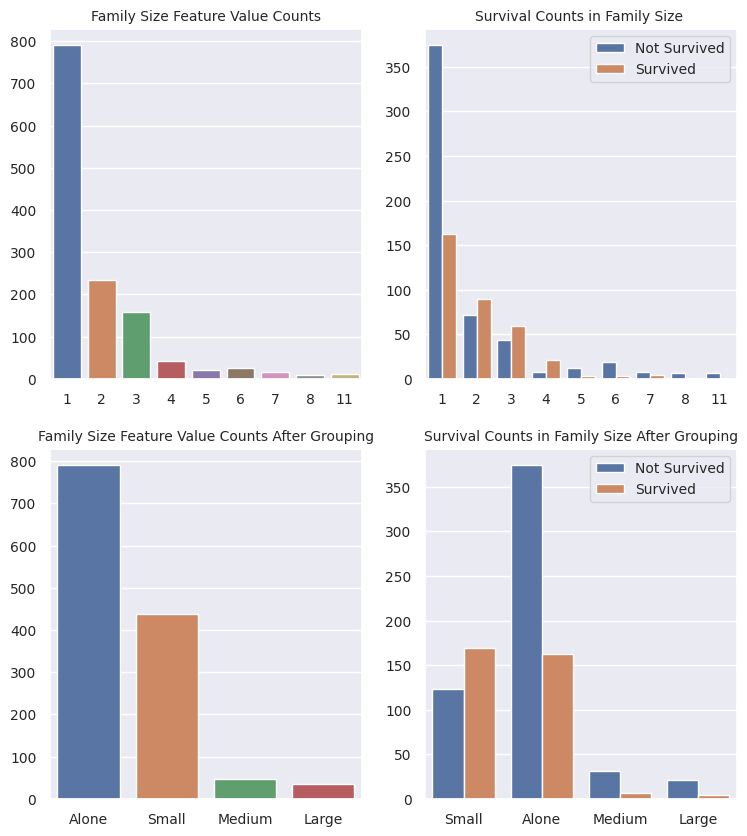

In [26]:
fig, axs = plt.subplots(figsize=(5, 10), ncols=2, nrows=2)
plt.subplots_adjust(right=1.5)

sns.barplot(x=titanic['Family_Size'].value_counts().index, y=titanic['Family_Size'].value_counts().values, ax=axs[0][0])
sns.countplot(x='Family_Size', hue='Survived', data=titanic, ax=axs[0][1])

axs[0][0].set_title('Family Size Feature Value Counts', size=10, y=1)
axs[0][1].set_title('Survival Counts in Family Size ', size=10, y=1)

sns.barplot(x=titanic['Family_Size_Grouped'].value_counts().index, y=titanic['Family_Size_Grouped'].value_counts().values, ax=axs[1][0])
sns.countplot(x='Family_Size_Grouped', hue='Survived', data=titanic, ax=axs[1][1])

axs[1][0].set_title('Family Size Feature Value Counts After Grouping', size=10, y=1)
axs[1][1].set_title('Survival Counts in Family Size After Grouping', size=10, y=1)

for i in range(2):
    axs[i][1].legend(['Not Survived', 'Survived'], loc='upper right', prop={'size': 10})
    for j in range(2):
        axs[i][j].tick_params(axis='x', labelsize=10)
        axs[i][j].tick_params(axis='y', labelsize=10)
        axs[i][j].set_xlabel('')
        axs[i][j].set_ylabel('')

plt.show()

#### 3.7 Frecuencia del Ticket
Da cuenta de las personas que compraron el ticket juntas pero no necesariamente son familia

In [27]:
titanic['Ticket_Frequency'] = titanic.groupby('Ticket')['Ticket'].transform('count')

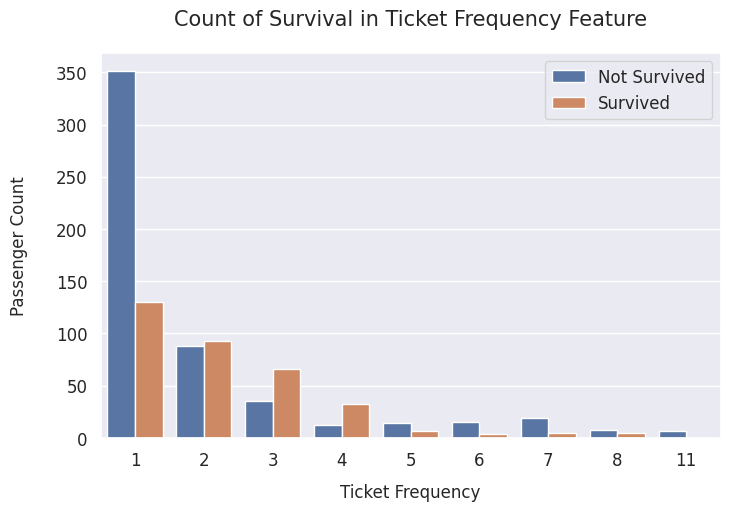

In [28]:
fig, axs = plt.subplots(figsize=(8, 5))
sns.countplot(x='Ticket_Frequency', hue='Survived', data=titanic)

plt.xlabel('Ticket Frequency', size=12, labelpad=10)
plt.ylabel('Passenger Count', size=12, labelpad=20)
plt.tick_params(axis='x', labelsize=12)
plt.tick_params(axis='y', labelsize=12)

plt.legend(['Not Survived', 'Survived'], loc='upper right', prop={'size': 12})
plt.title('Count of Survival in {} Feature'.format('Ticket Frequency'), size=15, y=1.05)

plt.show()

#### 3.8 Título - está casada

Primero se identifican a las mujeres casadas.  
Luego se agrupan todos los títulos femeninos.  
Se identifican títulos de hombres, se destaca Master dado a hombres bajo 26 años

In [29]:
titanic['Title'] = titanic['Name'].str.split(', ', expand=True)[1].str.split('.', expand=True)[0]
titanic['Is_Married'] = 0
titanic['Is_Married'].loc[titanic['Title'] == 'Mrs'] = 1

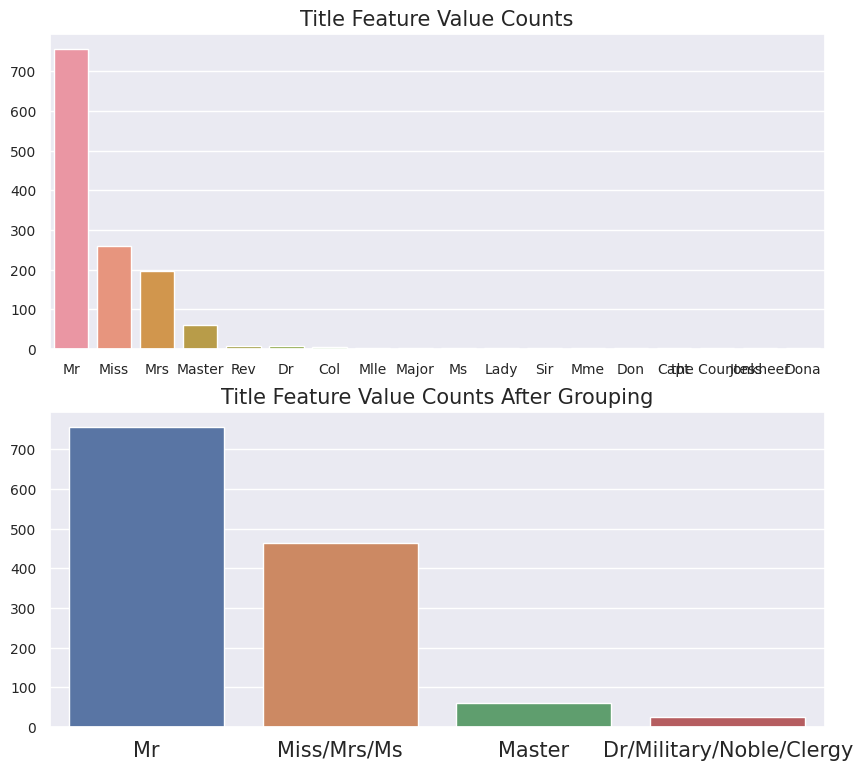

In [30]:
fig, axs = plt.subplots(nrows=2, figsize=(10, 9))
sns.barplot(x=titanic['Title'].value_counts().index, y=titanic['Title'].value_counts().values, ax=axs[0])

axs[0].tick_params(axis='x', labelsize=10)
axs[1].tick_params(axis='x', labelsize=15)

for i in range(2):
    axs[i].tick_params(axis='y', labelsize=10)

axs[0].set_title('Title Feature Value Counts', size=15, y=1)

titanic['Title'] = titanic['Title'].replace(['Miss', 'Mrs','Ms', 'Mlle', 'Lady', 'Mme', 'the Countess', 'Dona'], 'Miss/Mrs/Ms')
titanic['Title'] = titanic['Title'].replace(['Dr', 'Col', 'Major', 'Jonkheer', 'Capt', 'Sir', 'Don', 'Rev'], 'Dr/Military/Noble/Clergy')

sns.barplot(x=titanic['Title'].value_counts().index, y=titanic['Title'].value_counts().values, ax=axs[1])
axs[1].set_title('Title Feature Value Counts After Grouping', size=15, y=1)

plt.show()

#### 3.9 Encontrar el apellido

In [31]:
def extract_surname(data):

    families = []

    for i in range(len(data)):
        name = data.iloc[i]

        if '(' in name:
            name_no_bracket = name.split('(')[0]
        else:
            name_no_bracket = name

        family = name_no_bracket.split(',')[0]
        title = name_no_bracket.split(',')[1].strip().split(' ')[0]

        for c in string.punctuation:
            family = family.replace(c, '').strip()

        families.append(family)

    return families

In [32]:
titanic.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Deck,Family_Size,Family_Size_Grouped,Ticket_Frequency,Title,Is_Married
488,489,0.0,3,"Somerton, Mr. Francis William",male,"(29.5, 34.0]",0,0,A.5. 18509,"(7.896, 8.05]",NaN,S,M,1,Alone,1,Mr,0
684,685,0.0,2,"Brown, Mr. Thomas William Solomon",male,"(48.0, 80.0]",1,1,29750,"(34.075, 56.496]",NaN,S,M,3,Small,3,Mr,0
106,107,1.0,3,"Salkjelsvik, Miss. Anna Kristine",female,"(16.0, 21.0]",0,0,343120,"(7.25, 7.75]",NaN,S,M,1,Alone,1,Miss/Mrs/Ms,0
359,360,1.0,3,"Mockler, Miss. Helen Mary ""Ellie""",female,"(21.0, 22.0]",0,0,330980,"(7.75, 7.896]",NaN,Q,M,1,Alone,1,Miss/Mrs/Ms,0
104,105,0.0,3,"Gustafsson, Mr. Anders Vilhelm",male,"(34.0, 40.0]",2,0,3101276,"(7.896, 8.05]",NaN,S,M,3,Small,1,Mr,0


In [33]:

titanic['Family'] = extract_surname(titanic['Name'])

In [34]:
titanic.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Deck,Family_Size,Family_Size_Grouped,Ticket_Frequency,Title,Is_Married,Family
346,347,1.0,2,"Smith, Miss. Marion Elsie",female,"(34.0, 40.0]",0,0,31418,"(10.5, 13.0]",NaN,S,M,1,Alone,1,Miss/Mrs/Ms,0,Smith
331,332,0.0,1,"Partner, Mr. Austen",male,"(40.0, 48.0]",0,0,113043,"(26.55, 34.075]",C124,S,ABC,1,Alone,1,Mr,0,Partner
197,1089,NaN,3,"Nilsson, Miss. Berta Olivia",female,"(16.0, 21.0]",0,0,347066,"(7.75, 7.896]",NaN,S,M,1,Alone,1,Miss/Mrs/Ms,0,Nilsson
300,1192,NaN,3,"Olsson, Mr. Oscar Wilhelm",male,"(29.5, 34.0]",0,0,347079,"(7.75, 7.896]",NaN,S,M,1,Alone,1,Mr,0,Olsson
95,96,0.0,3,"Shorney, Mr. Charles Joseph",male,"(22.0, 25.0]",0,0,374910,"(7.896, 8.05]",NaN,S,M,1,Alone,1,Mr,0,Shorney


titanic.sample(5)

#### 3.10 Nuevas features: Family survival rate, Ticket survival rate

Family_Survival_Rate is calculated from families in training set since there is no Survived feature in test set. A list of family names that are occuring in both training and test set (non_unique_families), is created. The survival rate is calculated for families with more than 1 members in that list, and stored in Family_Survival_Rate feature.

An extra binary feature Family_Survival_Rate_NA is created for families that are unique to the test set. This feature is also necessary because there is no way to calculate those families' survival rate. This feature implies that family survival rate is not applicable to those passengers because there is no way to retrieve their survival rate.

Ticket_Survival_Rate and Ticket_Survival_Rate_NA features are also created with the same method.  
Ticket_Survival_Rate and Family_Survival_Rate are averaged and become Survival_Rate, and   
Ticket_Survival_Rate_NA and Family_Survival_Rate_NA are also averaged and become Survival_Rate_NA.

In [35]:
train = titanic[titanic['Survived'].notna()]
test = titanic[titanic['Survived'].isna()]

Crea una lista de familias que se encuentran en el train y test.  
Crea una lista de tickets que se encuentran en el train y test.  
Calcula una tasa de sobrevivencia en base al tamaño del gupo famliar.  
Lo hace para 'Family' y para 'Ticket'

In [36]:
# Creating a list of families and tickets that are occuring in both training and test set
non_unique_families = [x for x in train['Family'].unique() if x in test['Family'].unique()]
non_unique_tickets = [x for x in train['Ticket'].unique() if x in test['Ticket'].unique()]

df_family_survival_rate = train.groupby('Family')['Survived', 'Family', 'Family_Size'].median()
df_ticket_survival_rate = train.groupby('Ticket')['Survived', 'Ticket', 'Ticket_Frequency'].median()

In [37]:
df_family_survival_rate.head(3)

,Survived,Family_Size
Family,,
Abbing,0.0,1.0
Abbott,0.5,3.0
Abelson,0.5,2.0


In [38]:
df_ticket_survival_rate.sample(3)

,Survived,Ticket_Frequency
Ticket,,
A/4 45380,0.0,1.0
17463,0.0,2.0
4579,0.0,1.0


In [39]:
family_rates = {}
ticket_rates = {}

# Checking a family exists in both training and test set, and has members more than 1
for i in range(len(df_family_survival_rate)):
    if df_family_survival_rate.index[i] in non_unique_families and df_family_survival_rate.iloc[i, 1] > 1:
        family_rates[df_family_survival_rate.index[i]] = df_family_survival_rate.iloc[i, 0]

# Checking a ticket exists in both training and test set, and has members more than 1
for i in range(len(df_ticket_survival_rate)):
    if df_ticket_survival_rate.index[i] in non_unique_tickets and df_ticket_survival_rate.iloc[i, 1] > 1:
        ticket_rates[df_ticket_survival_rate.index[i]] = df_ticket_survival_rate.iloc[i, 0]

In [40]:
mean_survival_rate = np.mean(train['Survived'])

Family survival rate

In [41]:
train_family_survival_rate = []
train_family_survival_rate_NA = []
test_family_survival_rate = []
test_family_survival_rate_NA = []

for i in range(len(train)):
    if train['Family'][i] in family_rates:
        train_family_survival_rate.append(family_rates[train['Family'][i]])
        train_family_survival_rate_NA.append(1)
    else:
        train_family_survival_rate.append(mean_survival_rate)
        train_family_survival_rate_NA.append(0)

for i in range(len(test)):
    if test['Family'].iloc[i] in family_rates:
        test_family_survival_rate.append(family_rates[test['Family'].iloc[i]])
        test_family_survival_rate_NA.append(1)
    else:
        test_family_survival_rate.append(mean_survival_rate)
        test_family_survival_rate_NA.append(0)

train['Family_Survival_Rate'] = train_family_survival_rate
train['Family_Survival_Rate_NA'] = train_family_survival_rate_NA
test['Family_Survival_Rate'] = test_family_survival_rate
test['Family_Survival_Rate_NA'] = test_family_survival_rate_NA

In [42]:
test['Family_Survival_Rate'].head()

0    0.383838
1    0.383838
2    0.383838
3    0.383838
4    1.000000
Name: Family_Survival_Rate, dtype: float64

Ticket survival rate

In [43]:
train_ticket_survival_rate = []
train_ticket_survival_rate_NA = []
test_ticket_survival_rate = []
test_ticket_survival_rate_NA = []

for i in range(len(train)):
    if train['Ticket'][i] in ticket_rates:
        train_ticket_survival_rate.append(ticket_rates[train['Ticket'][i]])
        train_ticket_survival_rate_NA.append(1)
    else:
        train_ticket_survival_rate.append(mean_survival_rate)
        train_ticket_survival_rate_NA.append(0)

for i in range(len(test)):
    if test['Ticket'].iloc[i] in ticket_rates:
        test_ticket_survival_rate.append(ticket_rates[test['Ticket'].iloc[i]])
        test_ticket_survival_rate_NA.append(1)
    else:
        test_ticket_survival_rate.append(mean_survival_rate)
        test_ticket_survival_rate_NA.append(0)

train['Ticket_Survival_Rate'] = train_ticket_survival_rate
train['Ticket_Survival_Rate_NA'] = train_ticket_survival_rate_NA
test['Ticket_Survival_Rate'] = test_ticket_survival_rate
test['Ticket_Survival_Rate_NA'] = test_ticket_survival_rate_NA

Overall Survival rate

In [44]:
for df in [train, test]:
    df['Survival_Rate'] = (df['Ticket_Survival_Rate'] + df['Family_Survival_Rate']) / 2
    df['Survival_Rate_NA'] = (df['Ticket_Survival_Rate_NA'] + df['Family_Survival_Rate_NA']) / 2

### 4. Preprocesamiento

#### 4.1 LabelEncoding

In [45]:
non_numeric_features = ['Embarked', 'Sex', 'Deck', 'Title', 'Family_Size_Grouped', 'Age', 'Fare','Is_Married']

for df in [train, test]:
    for feature in non_numeric_features:
        df[feature] = LabelEncoder().fit_transform(df[feature])

#### 4.2 OneHot Encoding

In [46]:
cat_features = ['Pclass', 'Sex', 'Deck', 'Embarked', 'Title', 'Family_Size_Grouped','Is_Married']
encoded_features = []

for df in [train, test]:
    for feature in cat_features:
        encoded_feat = OneHotEncoder().fit_transform(df[feature].values.reshape(-1, 1)).toarray()
        n = df[feature].nunique()
        cols = ['{}_{}'.format(feature, n) for n in range(1, n + 1)]
        encoded_df = pd.DataFrame(encoded_feat, columns=cols)
        encoded_df.index = df.index
        encoded_features.append(encoded_df)

In [47]:
train = pd.concat([train, *encoded_features[:7]], axis=1) #concatena las 6 primeras categorías codificadas
test = pd.concat([test, *encoded_features[7:]], axis=1) # contanena las 6 siguientes catergorias codificadas

#### 4.3 Eliminar features irrelevantes

In [48]:
titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Deck', 'Family_Size',
       'Family_Size_Grouped', 'Ticket_Frequency', 'Title', 'Is_Married',
       'Family'],
      dtype='object')

In [49]:
pd.options.display.max_columns=45


In [50]:
titanic = pd.concat([train, test], sort=True).reset_index(drop=True)

In [51]:
titanic = pd.concat([train, test], sort=True).reset_index(drop=True)
drop_cols = ['Deck', 'Cabin', 'Embarked', 'Family', 'Family_Size',
             'Name', 'Parch', 'PassengerId', 'Pclass', 'Sex', 'SibSp', 'Ticket', 'Title',
            'Ticket_Survival_Rate', 'Family_Survival_Rate', 'Ticket_Survival_Rate_NA', 'Family_Survival_Rate_NA']

titanic.drop(columns=drop_cols, inplace=True)

titanic.head()

,Age,Deck_1,Deck_2,Deck_3,Deck_4,Embarked_1,Embarked_2,Embarked_3,Family_Size_Grouped,Family_Size_Grouped_1,Family_Size_Grouped_2,Family_Size_Grouped_3,Family_Size_Grouped_4,Fare,Is_Married,Is_Married_1,Is_Married_2,Pclass_1,Pclass_2,Pclass_3,Sex_1,Sex_2,Survival_Rate,Survival_Rate_NA,Survived,Ticket_Frequency,Title_1,Title_2,Title_3,Title_4
0,2,0.0,0.0,0.0,1.0,0.0,0.0,1.0,3,0.0,0.0,0.0,1.0,0,0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.383838,0.0,0.0,1,0.0,0.0,0.0,1.0
1,7,1.0,0.0,0.0,0.0,1.0,0.0,0.0,3,0.0,0.0,0.0,1.0,11,1,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.000000,1.0,1.0,2,0.0,0.0,1.0,0.0
2,4,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0,1.0,0.0,0.0,0.0,3,0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.383838,0.0,1.0,1,0.0,0.0,1.0,0.0
3,7,1.0,0.0,0.0,0.0,0.0,0.0,1.0,3,0.0,0.0,0.0,1.0,10,1,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.383838,0.0,1.0,2,0.0,0.0,1.0,0.0
4,7,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0,1.0,0.0,0.0,0.0,3,0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.383838,0.0,0.0,1,0.0,0.0,0.0,1.0


In [52]:
#Se me olvidó tirar la cabina
titanic.drop(['Family_Size_Grouped_1','Family_Size_Grouped_2','Family_Size_Grouped_3','Family_Size_Grouped_4','Is_Married'], inplace=True, axis=1)

In [53]:
pd.options.display.max_columns=25

In [54]:
titanic.head()

,Age,Deck_1,Deck_2,Deck_3,Deck_4,Embarked_1,Embarked_2,Embarked_3,Family_Size_Grouped,Fare,Is_Married_1,Is_Married_2,Pclass_1,Pclass_2,Pclass_3,Sex_1,Sex_2,Survival_Rate,Survival_Rate_NA,Survived,Ticket_Frequency,Title_1,Title_2,Title_3,Title_4
0,2,0.0,0.0,0.0,1.0,0.0,0.0,1.0,3,0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.383838,0.0,0.0,1,0.0,0.0,0.0,1.0
1,7,1.0,0.0,0.0,0.0,1.0,0.0,0.0,3,11,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.000000,1.0,1.0,2,0.0,0.0,1.0,0.0
2,4,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0,3,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.383838,0.0,1.0,1,0.0,0.0,1.0,0.0
3,7,1.0,0.0,0.0,0.0,0.0,0.0,1.0,3,10,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.383838,0.0,1.0,2,0.0,0.0,1.0,0.0
4,7,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0,3,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.383838,0.0,0.0,1,0.0,0.0,0.0,1.0


#### 4.4 Volver a obtener los datos de train y test

In [55]:
train = titanic[titanic['Survived'].notna()]
test = titanic[titanic['Survived'].isna()]

test.drop('Survived', axis=1, inplace=True)

y = train['Survived']
train = train.drop('Survived', axis=1)

#### 4.4 Estandarización

In [56]:
#Cuidado, se debe realizar el escalador debe ser ajustado en los datos de entrenamiento, luego, con esa media y desviación estándar debo estandarizar los datos de test
scaler = StandardScaler()
train_esc = scaler.fit_transform(train)
test_esc = scaler.transform(test)

### 5. Modelamiento

In [59]:
titanic.value_counts

<bound method DataFrame.value_counts of       Age  Deck_1  Deck_2  Deck_3  Deck_4  Embarked_1  Embarked_2  Embarked_3  \
0       2     0.0     0.0     0.0     1.0         0.0         0.0         1.0   
1       7     1.0     0.0     0.0     0.0         1.0         0.0         0.0   
2       4     0.0     0.0     0.0     1.0         0.0         0.0         1.0   
3       7     1.0     0.0     0.0     0.0         0.0         0.0         1.0   
4       7     0.0     0.0     0.0     1.0         0.0         0.0         1.0   
...   ...     ...     ...     ...     ...         ...         ...         ...   
1304    3     0.0     0.0     0.0     1.0         0.0         0.0         1.0   
1305    7     1.0     0.0     0.0     0.0         1.0         0.0         0.0   
1306    7     0.0     0.0     0.0     1.0         0.0         0.0         1.0   
1307    3     0.0     0.0     0.0     1.0         0.0         0.0         1.0   
1308    3     0.0     0.0     0.0     1.0         1.0         0.0    

In [61]:
len(train_esc)

891

In [62]:
#Librerías de keras
import tensorflow as tf
layers = tf.keras.layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Dense, Dropout
from tensorflow.keras.optimizers import SGD #(stochastic gradien descent)
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras import regularizers

In [63]:
#Métricas de predicciones
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score

In [64]:
train_esc.shape[1]

24

In [161]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train_esc, y, test_size=0.2, random_state=42, shuffle=True)

In [201]:
y_train.value_counts()

0.0    444
1.0    268
Name: Survived, dtype: int64

In [202]:
#!pip install tensorflow-addons #para usar la precision como métrica (no viene por defecto en Keras)
#import tensorflow_addons as tfa

In [213]:
precision = tf.keras.metrics.Precision()

In [ ]:
# modelo 1
model1 = Sequential()
model1.add(Dense(16, input_shape=(train_esc.shape[1],), kernel_initializer='random_normal', activation='LeakyReLU'))
model1.add(Dense(64, kernel_initializer='random_normal', activation='LeakyReLU'))
model1.add(Dropout(0.2))
model1.add(Dense(64, kernel_initializer='random_normal', activation='LeakyReLU'))
model1.add(Dropout(0.2))
#model1.add(Dense(32, kernel_initializer='normal', kernel_regularizer=regularizers.L1L2(l1=1e-5, l2=1e-4), activation='LeakyReLU'))
#model1.add(Dropout(0.1))
model1.add(Dense(1, kernel_initializer='random_normal', activation='sigmoid'))

optimizer = tf.keras.optimizers.Adamax(learning_rate = 0.00001)
model1.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy',precision])

early_stopping_monitor =  EarlyStopping(patience=10)
history1 = model1.fit(X_train, y_train, batch_size=10, epochs=3000, verbose=2, validation_split=0.2, callbacks = [early_stopping_monitor])

Epoch 1/3000
57/57 - 1s - loss: 0.6933 - accuracy: 0.4605 - precision_2: 0.4223 - val_loss: 0.6932 - val_accuracy: 0.4825 - val_precision_2: 0.3421 - 1s/epoch - 25ms/step
Epoch 2/3000
57/57 - 0s - loss: 0.6931 - accuracy: 0.5220 - precision_2: 0.3945 - val_loss: 0.6931 - val_accuracy: 0.5804 - val_precision_2: 0.4138 - 189ms/epoch - 3ms/step
Epoch 3/3000
57/57 - 0s - loss: 0.6931 - accuracy: 0.5518 - precision_2: 0.4131 - val_loss: 0.6930 - val_accuracy: 0.6294 - val_precision_2: 0.4681 - 206ms/epoch - 4ms/step
Epoch 4/3000
57/57 - 0s - loss: 0.6928 - accuracy: 0.6380 - precision_2: 0.5361 - val_loss: 0.6928 - val_accuracy: 0.6783 - val_precision_2: 0.5556 - 197ms/epoch - 3ms/step
Epoch 5/3000
57/57 - 0s - loss: 0.6927 - accuracy: 0.6432 - precision_2: 0.5517 - val_loss: 0.6927 - val_accuracy: 0.6923 - val_precision_2: 0.6000 - 246ms/epoch - 4ms/step
Epoch 6/3000
57/57 - 0s - loss: 0.6926 - accuracy: 0.6503 - precision_2: 0.5798 - val_loss: 0.6926 - val_accuracy: 0.6853 - val_precision

In [244]:
train_loss = history1.history['loss']
val_loss = history1.history['val_loss']

Text(0.5, 1.0, 'Pérdida')

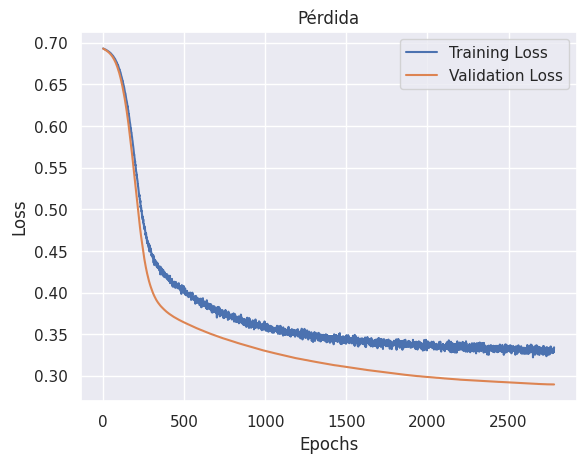

In [245]:
epochs = list(range(1, len(train_loss) + 1))

#Plotear la función de pérdida de entrenamiento y validación

plt.plot(epochs, train_loss, label = 'Training Loss')
plt.plot(epochs, val_loss, label = 'Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Pérdida')

In [246]:
threshold = 0.5
y_pred = model1.predict(X_test)

y_pred_bin = (y_pred >= threshold).astype(int)

print(classification_report(y_test, y_pred_bin))
print(confusion_matrix(y_test, y_pred_bin))

6/6 [==============================] - 0s 3ms/step
              precision    recall  f1-score   support

         0.0       0.84      0.87      0.85       105
         1.0       0.80      0.77      0.79        74

    accuracy                           0.83       179
   macro avg       0.82      0.82      0.82       179
weighted avg       0.83      0.83      0.83       179

[[91 14]
 [17 57]]


## Búsqueda de parámetros simple

In [64]:
!pip install keras-tuner --upgrade

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 176.1/176.1 kB 3.3 MB/s eta 0:00:00


In [70]:
#@title Búsqueda simple de hiperparámetros

import tensorflow as tf
from tensorflow import keras
from kerastuner.tuners import RandomSearch
from kerastuner import HyperModel

# Definir una clase de HyperModel que construirá el modelo
class MyHyperModel(HyperModel):
    def build(self, hp):
        model = keras.Sequential()
        model.add(keras.layers.Input(shape=(X_train.shape[1],)))

        # Agregar capas ocultas con hiperparámetros ajustables
        for i in range(hp.Int('num_layers', 1, 3, default=2)):
            model.add(keras.layers.Dense(units=hp.Int('units_' + str(i), min_value=16, max_value=128, step=16), activation='relu'))

        model.add(keras.layers.Dense(1, activation='sigmoid'))

        # Definir el optimizador y la tasa de aprendizaje
        optimizer = keras.optimizers.Adam(learning_rate=hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4]))
        model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
        return model

# Crear una instancia del HyperModel
hypermodel = MyHyperModel()

# Crear un tuner de búsqueda aleatoria
tuner = RandomSearch(
    hypermodel,
    objective='val_accuracy',  # Métrica a optimizar
    max_trials=10,             # Número total de combinaciones de hiperparámetros a probar
    executions_per_trial=1,    # Número de ejecuciones para cada combinación de hiperparámetros
    directory='my_dir',        # Directorio para guardar los resultados del tuner
    project_name='my_project'  # Nombre del proyecto
)

# Buscar hiperparámetros
tuner.search(train_esc, y, epochs=1000, validation_split=0.2)

# Obtener el mejor modelo y los hiperparámetros
best_model = tuner.get_best_models(num_models=1)[0]
best_hyperparameters = tuner.get_best_hyperparameters(num_trials=1)[0]

# Entrenar el mejor modelo con los datos completos
best_model.fit(train_esc, y, epochs=1000, batch_size=32, validation_split=0.2)


Trial 10 Complete [00h 03m 21s]
val_accuracy: 0.910614550113678

Best val_accuracy So Far: 0.916201114654541
Total elapsed time: 00h 32m 01s
Epoch 1/1000
23/23 [==============================] - 3s 20ms/step - loss: 0.2740 - accuracy: 0.8904 - val_loss: 0.2883 - val_accuracy: 0.8883
Epoch 2/1000
23/23 [==============================] - 0s 11ms/step - loss: 0.2751 - accuracy: 0.8933 - val_loss: 0.2909 - val_accuracy: 0.8771
Epoch 3/1000
23/23 [==============================] - 0s 10ms/step - loss: 0.2726 - accuracy: 0.8876 - val_loss: 0.3013 - val_accuracy: 0.8939
Epoch 4/1000
23/23 [==============================] - 0s 8ms/step - loss: 0.2829 - accuracy: 0.8778 - val_loss: 0.2709 - val_accuracy: 0.8827
Epoch 5/1000
23/23 [==============================] - 0s 9ms/step - loss: 0.2839 - accuracy: 0.8919 - val_loss: 0.2859 - val_accuracy: 0.8939
Epoch 6/1000
23/23 [==============================] - 0s 10ms/step - loss: 0.2725 - accuracy: 0.8890 - val_loss: 0.2896 - val_accuracy: 0.8994
Epo

In [71]:
# Get the top 2 models.
models = tuner.get_best_models(num_models=2)
best_model = models[0]
# Build the model.
# Needed for `Sequential` without specified `input_shape`.
best_model.build(input_shape=(None, 28, 28))
best_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                800       
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 dense_2 (Dense)             (None, 16)                272       
                                                                 
 dense_3 (Dense)             (None, 1)                 17        
                                                                 
Total params: 1,617
Trainable params: 1,617
Non-trainable params: 0
_________________________________________________________________


In [72]:
#@title resumen de resultados
tuner.results_summary()

Results summary
Results in my_dir/my_project
Showing 10 best trials
Objective(name="val_accuracy", direction="max")

Trial 02 summary
Hyperparameters:
num_layers: 3
units_0: 32
units_1: 16
learning_rate: 0.01
units_2: 16
Score: 0.916201114654541

Trial 01 summary
Hyperparameters:
num_layers: 3
units_0: 112
units_1: 32
learning_rate: 0.001
units_2: 16
Score: 0.910614550113678

Trial 03 summary
Hyperparameters:
num_layers: 1
units_0: 64
units_1: 80
learning_rate: 0.01
units_2: 32
Score: 0.910614550113678

Trial 05 summary
Hyperparameters:
num_layers: 2
units_0: 128
units_1: 112
learning_rate: 0.0001
units_2: 16
Score: 0.910614550113678

Trial 06 summary
Hyperparameters:
num_layers: 1
units_0: 32
units_1: 96
learning_rate: 0.01
units_2: 112
Score: 0.910614550113678

Trial 07 summary
Hyperparameters:
num_layers: 1
units_0: 128
units_1: 128
learning_rate: 0.0001
units_2: 112
Score: 0.910614550113678

Trial 09 summary
Hyperparameters:
num_layers: 3
units_0: 16
units_1: 48
learning_rate: 0.01

In [73]:
threshold = 0.5
y_pred = best_model.predict(X_test)

y_pred_bin = (y_pred >= threshold).astype(int)

print(classification_report(y_test, y_pred_bin))
print(confusion_matrix(y_test, y_pred_bin))

6/6 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

         0.0       0.89      0.95      0.92       113
         1.0       0.90      0.80      0.85        66

    accuracy                           0.89       179
   macro avg       0.89      0.87      0.88       179
weighted avg       0.89      0.89      0.89       179

[[107   6]
 [ 13  53]]


In [94]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dropout
from kerastuner.tuners import RandomSearch
from kerastuner import HyperModel

from time import time

start = time()
# Definir una clase de HyperModel que construirá el modelo
class MyHyperModel(HyperModel):
    def build(self, hp):
        model = keras.Sequential()
        model.add(keras.layers.Input(shape=(X_train.shape[1],)))

        # Agregar capas ocultas con hiperparámetros ajustables
        for i in range(hp.Int('num_layers', 1, 3, default=2)):
            model.add(keras.layers.Dense(
                units=hp.Int('units_' + str(i), min_value=16, max_value=256, step=16),
                activation=hp.Choice("activation", ["LeakyReLU", "relu"]),
                kernel_initializer=hp.Choice('kernel_initializer', ['glorot_uniform', 'he_normal', 'random_normal']),
                kernel_regularizer=keras.regularizers.l1_l2(
                    l1=hp.Float('l1_reg', min_value=1e-5, max_value=1e-2, sampling='log'),
                    l2=hp.Float('l2_reg', min_value=1e-5, max_value=1e-2, sampling='log')
                )
            ))
            model.add(Dropout(hp.Float('dropout_' + str(i), min_value=0.1, max_value=0.5, step=0.1)))

        model.add(keras.layers.Dense(1, activation='sigmoid'))
        # Definir el optimizador y la tasa de aprendizaje
        optimizer = keras.optimizers.Adamax(learning_rate=hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4]))
        model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
        return model

# Crear una instancia del HyperModel
hypermodel = MyHyperModel()

# Crear un tuner de búsqueda aleatoria con EarlyStopping
tuner = RandomSearch(
    hypermodel,
    objective='accuracy',  # Métrica a optimizar
    max_trials=50,             # Número total de combinaciones de hiperparámetros a probar
    executions_per_trial=3,    # Número de ejecuciones para cada combinación de hiperparámetros
    directory='/content/drive/MyDrive/Kaggle/01. Titanic',        # Directorio para guardar los resultados del tuner
    project_name='hiper_search_256'  # Nombre del proyecto
)

# Definir el callback EarlyStopping
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

# Buscar hiperparámetros con EarlyStopping
tuner.search(X_train, y_train, epochs=1000, validation_data=(X_val, y_val), callbacks=[early_stopping])

# Obtener el mejor modelo y los hiperparámetros
best_model = tuner.get_best_models(num_models=1)[0]
best_hyperparameters = tuner.get_best_hyperparameters(num_trials=1)[0]

# Entrenar el mejor modelo con los datos completos
best_model.fit(X_train, y_train, epochs=2000, batch_size=32, validation_data=(X_val, y_val), callbacks=[early_stopping])

timeUp = (time()-start)/60
print('\nTime spent[s]: {:.2f} minutes'.format(timeUp))


Trial 50 Complete [00h 00m 23s]
accuracy: 0.8721909920374552

Best accuracy So Far: 0.8998127381006876
Total elapsed time: 01h 58m 53s


NameError: ignored

In [95]:
# Entrenar el mejor modelo con los datos completos
best_model.fit(X_train, y_train, epochs=2000, batch_size=32, validation_data=(X_val, y_val))


Epoch 1/2000


23/23 [==============================] - 2s 15ms/step - loss: 0.4151 - accuracy: 0.8848 - val_loss: 0.5118 - val_accuracy: 0.8324
Epoch 2/2000
23/23 [==============================] - 0s 7ms/step - loss: 0.4180 - accuracy: 0.8975 - val_loss: 0.5162 - val_accuracy: 0.8212
Epoch 3/2000
23/23 [==============================] - 0s 7ms/step - loss: 0.4164 - accuracy: 0.8834 - val_loss: 0.5077 - val_accuracy: 0.8324
Epoch 4/2000
23/23 [==============================] - 0s 7ms/step - loss: 0.4096 - accuracy: 0.8919 - val_loss: 0.5037 - val_accuracy: 0.8324
Epoch 5/2000
23/23 [==============================] - 0s 7ms/step - loss: 0.4217 - accuracy: 0.8666 - val_loss: 0.5044 - val_accuracy: 0.8324
Epoch 6/2000
23/23 [==============================] - 0s 6ms/step - loss: 0.4210 - accuracy: 0.8806 - val_loss: 0.5016 - val_accuracy: 0.8324
Epoch 7/2000
23/23 [==============================] - 0s 6ms/step - loss: 0.4028 - accuracy: 0.8904 - val_loss: 0.5005 - val_accuracy: 0.8324
Epoch 8/2000
23/23

In [96]:
# Imprimir un resumen del mejor modelo
best_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 208)               5200      
                                                                 
 dropout (Dropout)           (None, 208)               0         
                                                                 
 dense_1 (Dense)             (None, 48)                10032     
                                                                 
 dropout_1 (Dropout)         (None, 48)                0         
                                                                 
 dense_2 (Dense)             (None, 96)                4704      
                                                                 
 dropout_2 (Dropout)         (None, 96)                0         
                                                                 
 dense_3 (Dense)             (None, 1)                 9

In [97]:
#@title resumen de resultados
tuner.results_summary()

Results summary
Results in /content/drive/MyDrive/Kaggle/01. Titanic/hiper_search_256
Showing 10 best trials
Objective(name="accuracy", direction="max")

Trial 05 summary
Hyperparameters:
num_layers: 3
units_0: 208
activation: relu
kernel_initializer: glorot_uniform
l1_reg: 3.7353135381430905e-05
l2_reg: 0.0024379227089591097
dropout_0: 0.30000000000000004
units_1: 48
dropout_1: 0.4
learning_rate: 0.001
units_2: 96
dropout_2: 0.2
Score: 0.8998127381006876

Trial 24 summary
Hyperparameters:
num_layers: 2
units_0: 80
activation: LeakyReLU
kernel_initializer: he_normal
l1_reg: 0.00042311027151009195
l2_reg: 5.411810412801679e-05
dropout_0: 0.1
units_1: 192
dropout_1: 0.30000000000000004
learning_rate: 0.001
units_2: 224
dropout_2: 0.5
Score: 0.8984082341194153

Trial 10 summary
Hyperparameters:
num_layers: 3
units_0: 48
activation: relu
kernel_initializer: he_normal
l1_reg: 6.763355950883466e-05
l2_reg: 0.0016767367974422334
dropout_0: 0.2
units_1: 176
dropout_1: 0.5
learning_rate: 0.01
u

In [98]:
threshold = 0.5
y_pred = best_model.predict(X_test)

y_pred_bin = (y_pred >= threshold).astype(int)

print(classification_report(y_test, y_pred_bin))
print(confusion_matrix(y_test, y_pred_bin))

6/6 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

         0.0       0.92      0.96      0.94       113
         1.0       0.93      0.86      0.90        66

    accuracy                           0.93       179
   macro avg       0.93      0.91      0.92       179
weighted avg       0.93      0.93      0.93       179

[[109   4]
 [  9  57]]


In [99]:
#Guardar modelo 2
"""
Trial 05 summary
Hyperparameters:
num_layers: 3
units_0: 208
activation: relu
kernel_initializer: glorot_uniform
l1_reg: 3.7353135381430905e-05
l2_reg: 0.0024379227089591097
dropout_0: 0.30000000000000004
units_1: 48
dropout_1: 0.4
learning_rate: 0.001
units_2: 96
dropout_2: 0.2
Score: 0.8998127381006876
"""
best_hyperparameters_2 = tuner.get_best_hyperparameters(num_trials=1)[0].values
print(best_hyperparameters_2)

{'num_layers': 3, 'units_0': 208, 'activation': 'relu', 'kernel_initializer': 'glorot_uniform', 'l1_reg': 3.7353135381430905e-05, 'l2_reg': 0.0024379227089591097, 'dropout_0': 0.30000000000000004, 'units_1': 48, 'dropout_1': 0.4, 'learning_rate': 0.001, 'units_2': 96, 'dropout_2': 0.2}


In [77]:
#Guardar modelo 1
"""Trial 07 summary
Hyperparameters:
num_layers: 3
units_0: 96
activation: LeakyReLU
kernel_initializer: glorot_uniform
l1_reg: 0.00043785244009154455
l2_reg: 0.00035154209941911236
units_1: 32
dropout_1: 0.30000000000000004
learning_rate: 0.0001
units_2: 48
dropout_2: 0.5
dropout_0: 0.1
Score: 0.8899812897046407"""
best_hyperparameters_1 = tuner.get_best_hyperparameters(num_trials=1)[0].values
print(best_hyperparameters_1)

{'num_layers': 3, 'units_0': 96, 'activation': 'LeakyReLU', 'kernel_initializer': 'glorot_uniform', 'l1_reg': 0.00043785244009154455, 'l2_reg': 0.00035154209941911236, 'units_1': 32, 'dropout_1': 0.30000000000000004, 'learning_rate': 0.0001, 'units_2': 48, 'dropout_2': 0.5, 'dropout_0': 0.1}


In [128]:
# Hacer predicciones en el conjunto de prueba con el modelo ensamblado 1
threshold = 0.5
y_pred = model1.predict(test_esc)

y_pred_bin = (y_pred >= threshold).astype(int)

14/14 [==============================] - 0s 2ms/step


In [101]:
y_pred_bin = pd.DataFrame(y_pred_bin)
columnas = ['Survived']
y_pred_bin.columns = columnas

test_data = pd.read_csv('/content/drive/MyDrive/Kaggle/01. Titanic/test.csv')
id = pd.DataFrame(test_data['PassengerId'])

predic = pd.concat([id, y_pred_bin], axis=1)

In [129]:
predic.to_csv('/content/drive/MyDrive/Kaggle/DNN_128.csv', index=False)